In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
INPUT = 'realistic'
# INPUT = 'toy'
if INPUT == 'toy':
    quality_cancel_func = lambda i, j: np.mean(i.sum(axis=1)) - np.mean(j.sum(axis=1))
elif INPUT == 'realistic':
    quality_cancel_func = lambda i, j: np.mean(i) - np.mean(j)

In [17]:
with open('../results/vary_plasticity_th_%s_input.pkl' % INPUT, 'rb') as f:
    df_th = pickle.load(f)
df_th = pd.DataFrame(df_th)

In [18]:
with open('../results/vary_HVC_sparsity_%s_input.pkl' % INPUT, 'rb') as f:
    df_cW = pickle.load(f)
df_cW = pd.DataFrame(df_cW)

In [19]:
aux = zip(df_th['TS_similarity_pre'], df_th['TS_similarity_post'])
df_th['quality_cancel'] = [quality_cancel_func(i, j) for i,j in aux]

In [20]:
aux = zip(df_cW['TS_similarity_pre'], df_cW['TS_similarity_post'])
df_cW['quality_cancel'] = [quality_cancel_func(i, j) for i,j in aux]

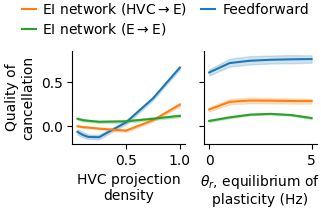

In [21]:
fig, ax = plt.subplots(1, 2, sharey='all', figsize=(3.2, 2))
hue_order = ['FF', 'EI', 'EIrec']
sns.lineplot(data=df_cW, x='cW', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax[0])
sns.lineplot(data=df_th, x='th', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax[1])
labels = ('EI network (HVC$\\to$E)', 'EI network (E$\\to$E)', 'Feedforward')
ls = [ax[0].plot(np.nan,0,c='C%d'%i, label=l)[0] for i, l in zip((1,2,0), labels)]
fig.legend(handles=ls, ncols=2, loc=(0.05,0.8))
ax[0].set(ylabel='Quality of\ncancellation', xlabel='HVC projection\ndensity', 
          title='$\ $\n')
ax[1].set(xlabel='$\\theta_r$, equilibrium of\nplasticity (Hz)')
fig.savefig('../svg/quality_cancel_%s_input.svg' % INPUT)

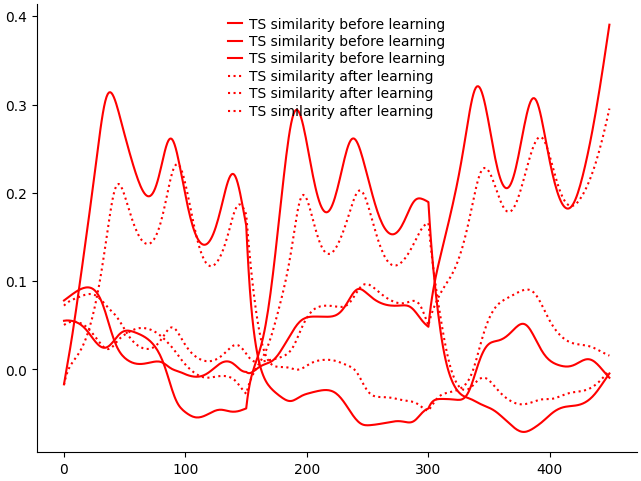

In [8]:
m, th, i = 'EIrec', 0, 2
plt.plot(df_th[(df_th.model==m)&(df_th.th==th)].iloc[i,2], c='r', 
         label='TS similarity before learning')
plt.plot(df_th[(df_th.model==m)&(df_th.th==th)].iloc[i,3], c='r', ls=':', 
         label='TS similarity after learning')
plt.legend()

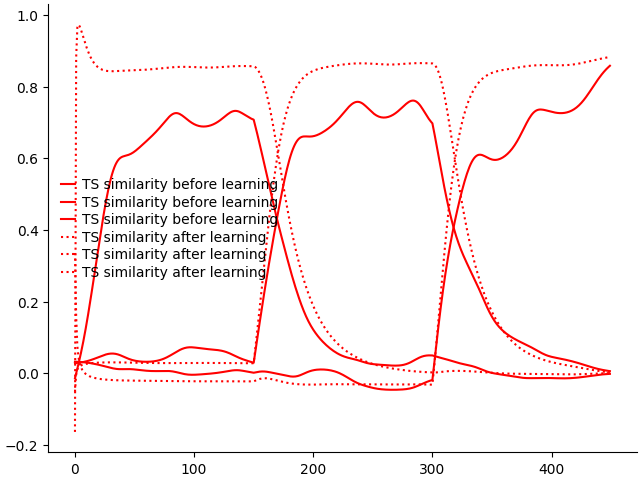

In [9]:
m, cW, i = 'FF', 0.05, 0
plt.plot(df_cW[(df_cW.model==m)&(df_cW.cW==cW)].iloc[i,2], c='r', 
         label='TS similarity before learning')
plt.plot(df_cW[(df_cW.model==m)&(df_cW.cW==cW)].iloc[i,3], c='r', ls=':', 
         label='TS similarity after learning')
plt.legend()